In [1]:
import os
import pandas as pd
from tqdm.auto import tqdm

directory = 'output/embeddings_citations/'

dfs = []
for f in tqdm(os.listdir(directory)):
    if f.endswith('.csv'):
        df = pd.read_csv(os.path.join(directory, f), header=None, index_col=False)
        dfs.append(df)

df = pd.concat(dfs)

  0%|          | 0/48 [00:00<?, ?it/s]

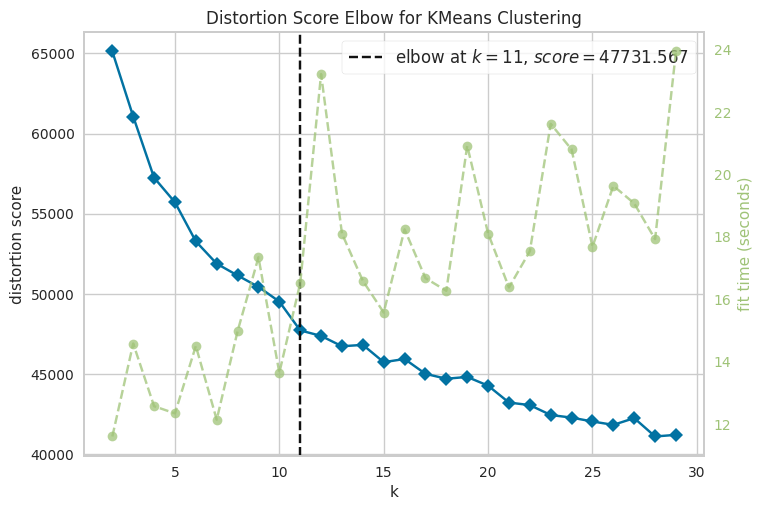

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

plt.set_loglevel('error')

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 30))
visualizer.fit(df.values)

visualizer.show()

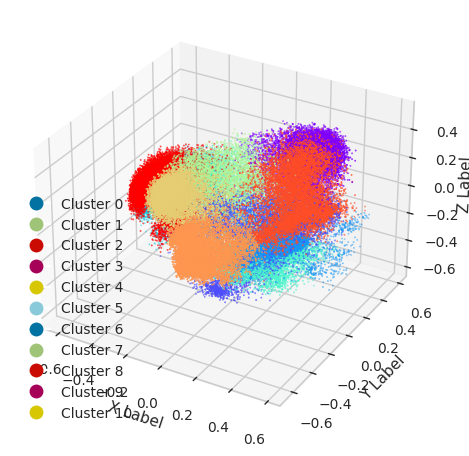

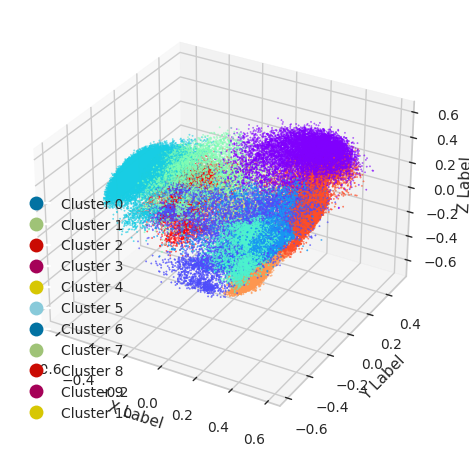

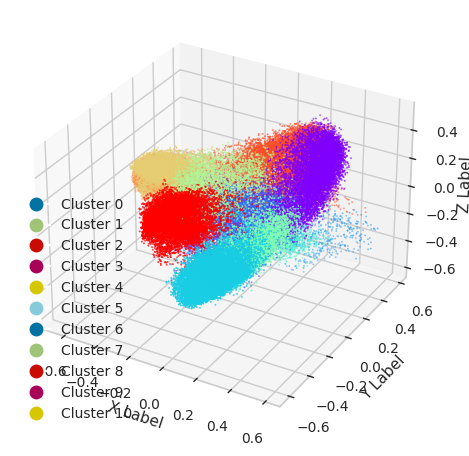

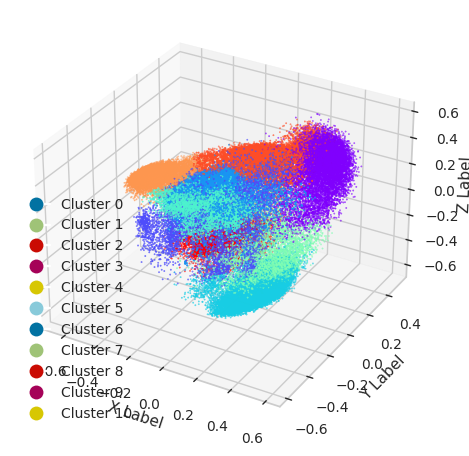

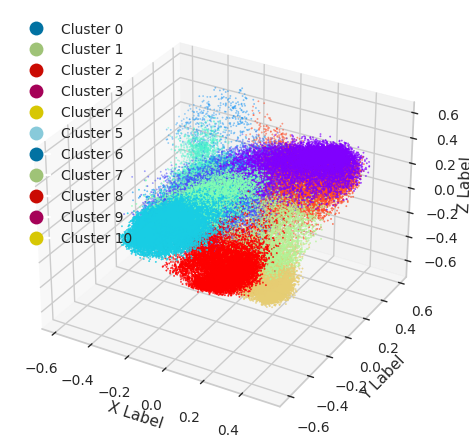

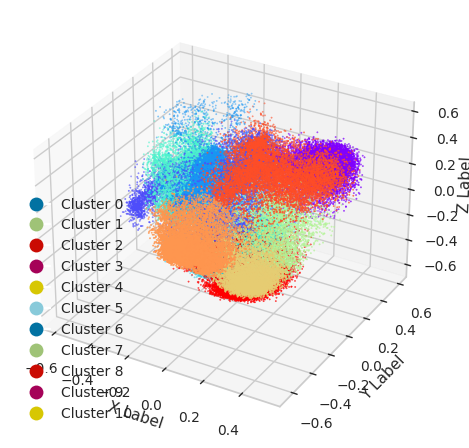

In [3]:
import numpy as np
from sklearn.decomposition import PCA
from itertools import permutations
from matplotlib.lines import Line2D

def plot_3d(matrix_origin, n_clusters):
    pca = PCA(n_components=3, random_state=42)
    matrix = pca.fit_transform(matrix_origin)
    clusters = KMeans(n_clusters=n_clusters, random_state=42).fit(matrix_origin)

    for t in permutations(range(3)):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        ax.scatter(matrix[:, t[0]], matrix[:, t[1]], matrix[:, t[2]], c=clusters.labels_, cmap='rainbow', s=1)

        handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='C'+str(i), markersize=10) for i in range(n_clusters)]
        plt.legend(handles, [f"Cluster {i}" for i in range(n_clusters)])
        plt.show()
        

plot_3d(df.values, visualizer.elbow_value_)